#Loading data from kaggle

In [3]:
import json

jason = {"username":"","key":""}
with open('kaggle.json','w') as outfile:
  json.dump(jason, outfile)

!pip install kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs
!unzip cuhk-face-sketch-database-cufs.zip

Streaming output truncated to the last 5000 lines.
  inflating: cropped_sketch/00726.jpg  
  inflating: cropped_sketch/00727.jpg  
  inflating: cropped_sketch/00728.jpg  
  inflating: cropped_sketch/00729.jpg  
  inflating: cropped_sketch/00730.jpg  
  inflating: cropped_sketch/00731.jpg  
  inflating: cropped_sketch/00732.jpg  
  inflating: cropped_sketch/00733.jpg  
  inflating: cropped_sketch/00734.jpg  
  inflating: cropped_sketch/00735.jpg  
  inflating: cropped_sketch/00736.jpg  
  inflating: cropped_sketch/00737.jpg  
  inflating: cropped_sketch/00738.jpg  
  inflating: cropped_sketch/00739.jpg  
  inflating: cropped_sketch/00740.jpg  
  inflating: cropped_sketch/00741.jpg  
  inflating: cropped_sketch/00742.jpg  
  inflating: cropped_sketch/00743.jpg  
  inflating: cropped_sketch/00744.jpg  
  inflating: cropped_sketch/00745.jpg  
  inflating: cropped_sketch/00746.jpg  
  inflating: cropped_sketch/00747.jpg  
  inflating: cropped_sketch/00749.jpg  
  inflating: cropped_sketch/0

# Load Data

['f1-001-01-sz1.jpg', 'f1-002-01-sz1.jpg', 'f1-003-01-sz1.jpg', 'f1-004-01-sz1.jpg', 'f1-005-01-sz1.jpg', 'f1-006-01-sz1.jpg', 'f1-007-01-sz1.jpg', 'f1-008-01-sz1.jpg', 'f1-009-01-sz1.jpg', 'f1-010-01-sz1.jpg', 'f1-011-01-sz1.jpg', 'f1-012-01-sz1.jpg', 'f1-013-01-sz1.jpg', 'f1-014-01-sz1.jpg', 'f1-015-01-sz1.jpg', 'F2-005-01-sz1.jpg', 'F2-006-01-sz1.jpg', 'F2-007-01-sz1.jpg', 'F2-008-01-sz1.jpg', 'F2-009-01-sz1.jpg', 'F2-010-01-sz1.jpg', 'F2-011-01-sz1.jpg', 'F2-012-01-sz1.jpg', 'F2-013-01-sz1.jpg', 'F2-014-01-sz1.jpg', 'F2-015-01-sz1.jpg', 'F2-016-01-sz1.jpg', 'F2-017-01-sz1.jpg', 'F2-018-01-sz1.jpg', 'F2-019-01-sz1.jpg', 'F2-020-01-sz1.jpg', 'F2-021-01-sz1.jpg', 'F2-022-01-sz1.jpg', 'F2-023-01-sz1.jpg', 'F2-024-01-sz1.jpg', 'F2-025-01-sz1.jpg', 'F2-026-01-sz1.jpg', 'F2-027-01-sz1.jpg', 'F2-028-01-sz1.jpg', 'F2-029-01-sz1.jpg', 'F2-030-01-sz1.jpg', 'F2-031-01-sz1.jpg', 'F2-032-01-sz1.jpg', 'F2-033-01-sz1.jpg', 'F2-034-01-sz1.jpg', 'F2-035-01-sz1.jpg', 'F2-036-01-sz1.jpg', 'F2-037-01-s

188it [00:02, 78.44it/s] 


940
[519, 215, 482, 902, 139, 468, 621, 223, 231, 76]


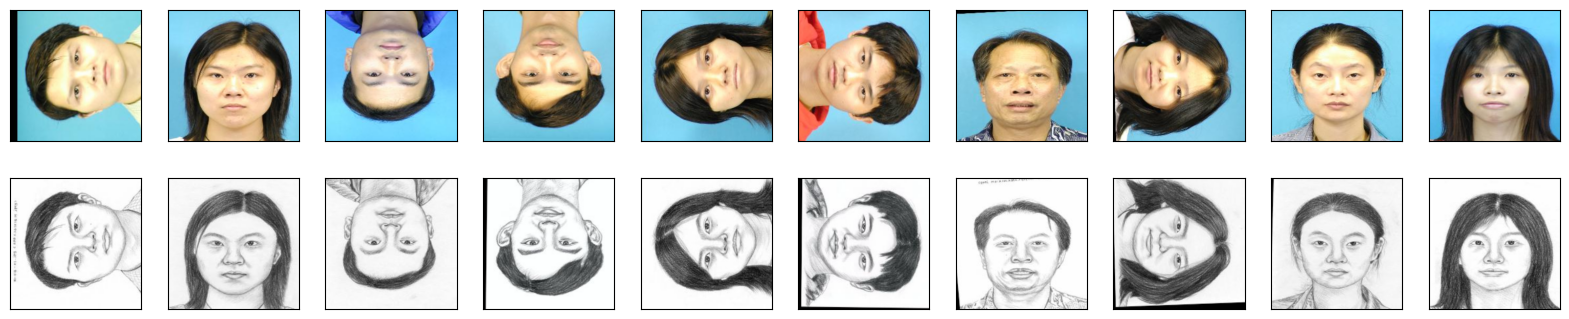

In [4]:
import numpy as np
import os
import cv2 as cv
from tqdm import tqdm
import random
import itertools
import pandas as pd
import matplotlib.pyplot as plt


faces, sketches = [], []

facesfiles = os.listdir('photos')

f1, f, m, m1 = [], [], [], []
for fil in facesfiles:
  if fil[:2] == 'f1':
    f1.append(fil)
  elif fil[:2] == 'f-':
    f.append(fil)
  elif fil[:2] == 'm1':
    m1.append(fil)
  elif fil[:2] == 'm-':
    m.append(fil)

facesfiles = list(itertools.chain(sorted(f1), sorted(f), sorted(m1), sorted(m)))

sketchesfiles = os.listdir('sketches')

f1sk, F2, fsk, m1sk, M2, msk = [], [], [], [], [], []
for fil in sketchesfiles:
  if fil[:2] == 'f1':
    f1sk.append(fil)
  elif fil[:2] == 'F2':
    F2.append(fil)
  elif fil[:2] == 'f-':
    fsk.append(fil)
  elif fil[:2] == 'm1':
    m1sk.append(fil)
  elif fil[:2] == 'M2':
    M2.append(fil)
  elif fil[:2] == 'm-':
    msk.append(fil)

sketchesfiles = list(itertools.chain(sorted(f1sk), sorted(F2), sorted(fsk), sorted(m1sk), sorted(M2), sorted(msk)))
print(sketchesfiles)

for face, sketch in tqdm(zip(facesfiles, sketchesfiles)):
  imface = cv.imread('photos/{}'.format(face))
  imface = cv.cvtColor(imface, cv.COLOR_BGR2RGB)
  imface = cv.resize(imface, (256, 256))
  imface = imface.astype('float32') / 255.0
  faces.append(imface)

  faces.append(cv.flip(imface, 1))
  faces.append(cv.flip(imface, -1))

  faces.append(cv.rotate(imface, cv.ROTATE_90_CLOCKWISE))
  faces.append(cv.rotate(imface, cv.ROTATE_90_COUNTERCLOCKWISE))

  skface = cv.imread('sketches/{}'.format(sketch))
  skface = cv.resize(skface, (256, 256))
  skface = skface.astype('float32') / 255.0
  sketches.append(skface)

  sketches.append(cv.flip(skface, 1))
  sketches.append(cv.flip(skface, -1))

  sketches.append(cv.rotate(skface, cv.ROTATE_90_CLOCKWISE))
  sketches.append(cv.rotate(skface, cv.ROTATE_90_COUNTERCLOCKWISE))


print(len(sketches))

# cv.imshow("Display window", faces[0])

# plt.figure()
# print(facesfiles[127])
# plt.imshow(faces[127])
# plt.show()
# plt.figure()
# print(sketchesfiles[127])
# plt.imshow(sketches[127])
# plt.show()

randomImages = random.sample(range(0, len(sketches)), 10)
print(randomImages)
n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faces[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketches[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Split data

(940, 256, 256, 3)
(940, 256, 256, 3)
940
(752, 256, 256, 3)
(188, 256, 256, 3)


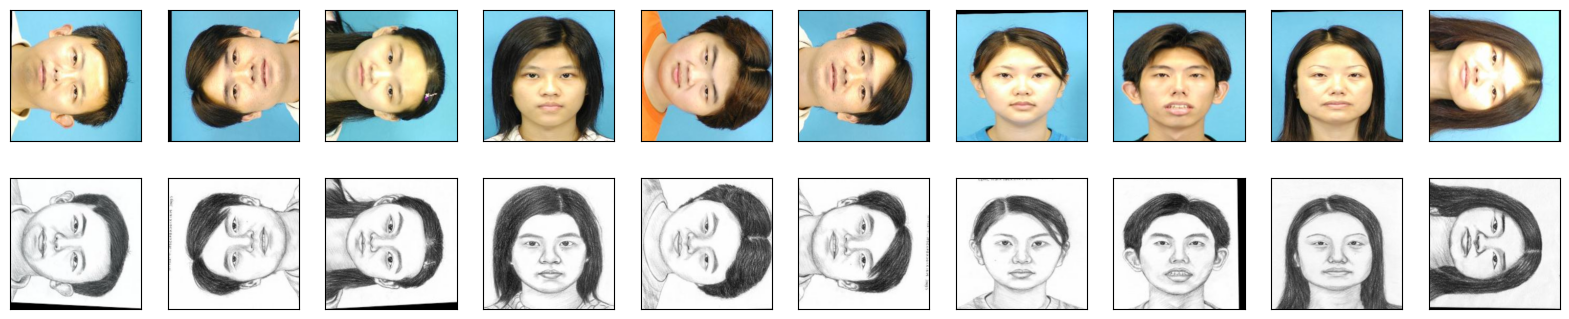

In [5]:
data = list(zip(faces, sketches))
random.Random(1).shuffle(data)
faces, sketches = zip(*data)
faces = np.array(faces)
sketches = np.array(sketches)

print(faces.shape)
print(sketches.shape)

n = faces.shape[0]
print(n)

trainTestSplit = 0.8
faceTrain = faces[:752, :, :, :]
faceTest = faces[752:, :, :, :]
sketchTrain = sketches[:752, :, :, :]
sketchTest = sketches[752:, :, :, :]

print(faceTrain.shape)
print(faceTest.shape)
n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faceTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketchTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Model

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Input, Lambda, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

# Sampling function for the VAE
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], K.int_shape(z_mean)[1]))
    return z_mean + K.exp(z_log_sigma / 2) * epsilon

# VAE Model Definition
def build_conv_vae(input_shape, bottleneck_size, sampling):

    # ENCODER
    inputs = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))  # Input layer (256x256x3)
    x = Conv2D(32, (5, 5), 2, padding='same', kernel_initializer='he_normal')(inputs)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)
    x = Conv2D(64, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(128, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)
    x = Conv2D(256, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)

    # Latent Variable Calculation (z_mean and z_log_sigma)
    shape = K.int_shape(x)
    flatten_1 = Flatten()(x)
    dense_1 = Dense(bottleneck_size, name='z_mean')(flatten_1)
    z_mean = BatchNormalization()(dense_1)
    flatten_2 = Flatten()(x)
    dense_2 = Dense(bottleneck_size, name='z_log_sigma')(flatten_2)
    z_log_sigma = BatchNormalization()(dense_2)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

    # DECODER
    latent_inputs = Input(shape=(bottleneck_size,), name='decoder_input')
    x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
    x = Reshape((shape[1], shape[2], shape[3]))(x)
    x = Conv2DTranspose(512, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)
    x = Conv2DTranspose(256, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(128, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)
    x = Conv2DTranspose(64, (3, 3), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(32, (5, 5), 2, padding='same', kernel_initializer='he_normal')(x)
    x = LeakyReLU()(x)
    output = Conv2DTranspose(3, (5, 5), 1, activation='sigmoid', padding='same')(x)

    decoder = Model(latent_inputs, output, name='decoder')

    # VAE Model (Full Model: Encoder + Decoder)
    output_vae = decoder(encoder(inputs)[2])  # Use the latent z from encoder
    vae = Model(inputs, output_vae, name='vae')

    return vae, encoder, decoder, z_mean, z_log_sigma

# Build the model
vae_2, encoder, decoder, z_mean, z_log_sigma = build_conv_vae((256, 256, 3), 512, sampling)

# Display the model summaries
print("encoder summary:")
encoder.summary()
print("decoder summary:")
decoder.summary()
print("vae summary:")
vae_2.summary()


encoder summary:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 128, 128, 32)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 32)   │              0 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64, 64, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 32, 32, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 32, 128)    │              0 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 256)    │        295,168 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 16, 16, 256)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 512)      │      1,180,160 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 8, 8, 512)      │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8, 8, 512)      │              0 │ leaky_re_lu_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32768)          │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 32768)          │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)       

 Total params: 35,130,944 (134.01 MB)

 Trainable params: 35,128,256 (134.00 MB)

 Non-trainable params: 2,688 (10.50 KB)

decoder summary:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32768)               │      16,809,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 256, 256, 32)        │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 256, 256, 3)         │           2,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,772,163 (79.24 MB)

 Trainable params: 20,772,163 (79.24 MB)

 Non-trainable params: 0 (0.00 B)

vae summary:


Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ [(None, 512), (None, 512),  │      35,130,944 │
│                                      │ (None, 512)]                │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 256, 256, 3)         │      20,772,163 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,903,107 (213.25 MB)

 Trainable params: 55,900,419 (213.24 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# SSIM Loss function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

# VAE Loss function
def vae_loss(input_img, output, z_mean, z_log_sigma):
    # Reconstruction loss (using SSIM)
    reconstruction_loss = ssim_loss(input_img, output)

    # Compute the KL Divergence regularization term
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)

    # Return the total loss
    total_loss = reconstruction_loss + 0.0001 * kl_loss
    return total_loss

# Custom wrapper to get latent variables from encoder and compute loss
def vae_loss_wrapper(input_img, output):
    # Get the z_mean and z_log_sigma from the encoder
    z_mean, z_log_sigma, _ = encoder(input_img)
    return vae_loss(input_img, output, z_mean, z_log_sigma)


# Train


#face2sketch

In [ ]:
# Compile the model with custom loss
vae_2.compile(optimizer='adam', loss=vae_loss_wrapper, metrics=['mse', 'mae'])

# Train the model
vae_2Train = vae_2.fit(faceTrain, sketchTrain, epochs=100, batch_size=32,
                       validation_data=(faceTest, sketchTest))

# Plot the training loss
plt.plot(vae_2Train.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Loss Over Epochs')
plt.show()

Epoch 1/100


ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


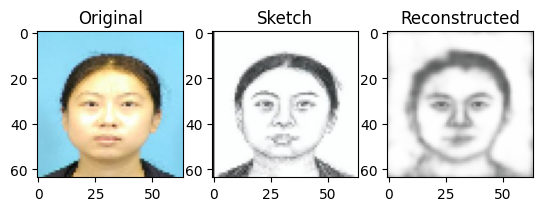

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


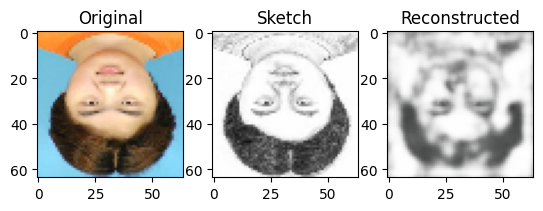

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


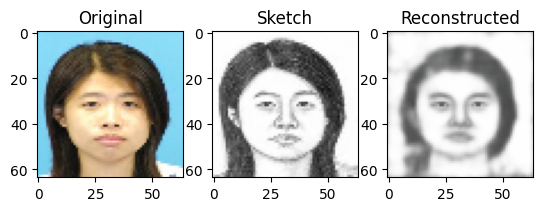

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


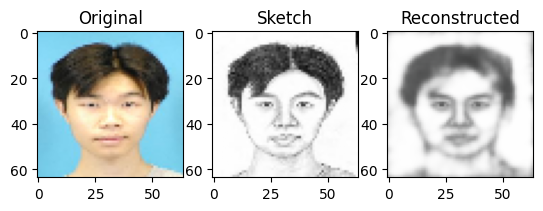

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


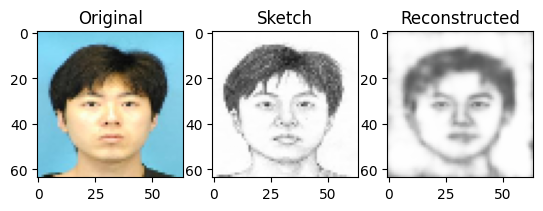

In [ ]:
for i in range(5):
    decode = vae_2.predict(faceTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,2)
    plt.title("Sketch")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

#sketch2face

In [9]:
n_size = 256
vae_2skf, encoder, decoder, z_mean, z_log_sigma = build_conv_vae((256, 256, 3), n_size, sampling)
vae_2skf.compile(optimizer='adam', loss= vae_loss_wrapper, metrics=['mse', 'mae'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

# Mount Google Drive (this will ask for Google Drive authorization)
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import register_keras_serializable
import tensorflow.keras.backend as K
from google.colab import drive

# Register the custom function
@register_keras_serializable(package="Custom")
def sampling(args):
    """Reparameterization trick for VAE."""
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], K.int_shape(z_mean)[1]))
    return z_mean + K.exp(z_log_sigma / 2) * epsilon

# Path to the saved model
model_path = "/content/drive/MyDrive/vae_2skf_best_model.h5"

# Load model with custom objects and compile=False to avoid unnecessary errors
vae_2skf = load_model(model_path, custom_objects={"sampling": sampling}, compile=False)

# Step 4: Recompile the model before resuming training
vae_2skf.compile(optimizer="adam", loss="mse")  # Use the correct optimizer and loss from original training

print("✅ Model loaded successfully from:", model_path)

# Step 4: Define a custom callback to save the best model every 5 epochs
class SaveBestEvery5Epochs(tf.keras.callbacks.Callback):
    def __init__(self, save_path, monitor='val_loss', mode='min'):
        super(SaveBestEvery5Epochs, self).__init__()
        self.save_path = save_path
        self.monitor = monitor
        self.mode = mode
        self.best_value = float('inf') if mode == 'min' else float('-inf')

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:  # Save only at multiples of 5
            current_value = logs.get(self.monitor)
            if current_value is not None:
                if (self.mode == 'min' and current_value < self.best_value) or \
                   (self.mode == 'max' and current_value > self.best_value):
                    self.best_value = current_value
                    self.model.save(self.save_path)
                    print(f"✅ Best model updated and saved at epoch {epoch+1} with {self.monitor}: {self.best_value}")

# Step 5: Continue Training from Epoch 20 to 80
vae_2skfTrain = vae_2skf.fit(sketchTrain, faceTrain,
                             initial_epoch=35,  # Resume from epoch 20
                             epochs=80,         # Continue training up to 80 epochs
                             batch_size=32,
                             shuffle=True,
                             validation_data=(sketchTest, faceTest),
                             callbacks=[SaveBestEvery5Epochs(model_path)])

# Step 6: Plot Training Loss
plt.plot(vae_2skfTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model loaded successfully from: /content/drive/MyDrive/vae_2skf_best_model.h5
Epoch 36/80


KeyboardInterrupt: 

In [2]:
vae_2skf.save('/content/vae_model.h5')

NameError: name 'vae_2skf' is not defined

In [ ]:
from google.colab import files
files.download('/content/vae_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
for i in range(5):
    decode = vae_2skf.predict(sketchTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,2)
    plt.title("Photo")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

NameError: name 'vae_2skf' is not defined

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the custom image
img_path = "/content/f1-002-01-sz1.jpg"  # Path to your custom image
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match input shape
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
img_array = img_array / 255.0  # Normalize the image

# Run the image through the trained VAE model
decode = vae_2skf.predict(img_array)  # Get the reconstructed image

# Convert back to displayable format
decode_img = np.clip(decode[0], 0, 1)  # Ensure pixel values are between 0 and 1

# Plot original, expected photo (if available), and reconstructed image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Sketch")
plt.imshow(img)  # Display original sketch
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Photo")
plt.imshow(decode_img)  # Display reconstructed image
plt.axis("off")

plt.show()

NameError: name 'vae_2skf' is not defined